In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 247MB/s]
100% 1.06G/1.06G [00:11<00:00, 102MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , BatchNormalization ,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
  labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#we should normalize the pixels otherwise results will not be accurate

In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
#model.add(Dropout(0.3))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 2.3673 - accuracy: 0.6184 - val_loss: 1.0842 - val_accuracy: 0.6726
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.9718 - accuracy: 0.6961 - val_loss: 0.8383 - val_accuracy: 0.6984
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.7407 - accuracy: 0.7464 - val_loss: 0.7153 - val_accuracy: 0.7242
Epoch 4/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6442 - accuracy: 0.7721 - val_loss: 0.6020 - val_accuracy: 0.7844
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5760 - accuracy: 0.7912 - val_loss: 0.6274 - val_accuracy: 0.7332
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5234 - accuracy: 0.8105 - val_loss: 0.5085 - val_accuracy: 0.8194
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5000 - accuracy: 0.8279 - val_loss: 0.5565 - val_ac

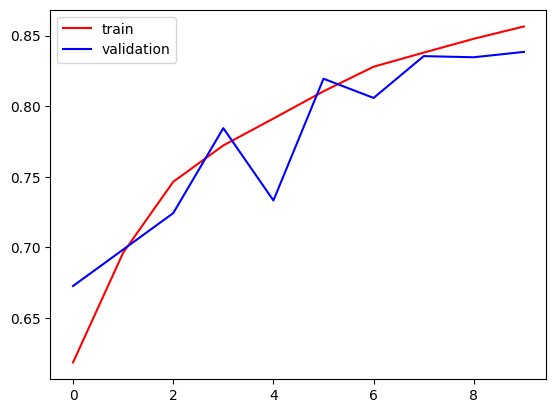

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

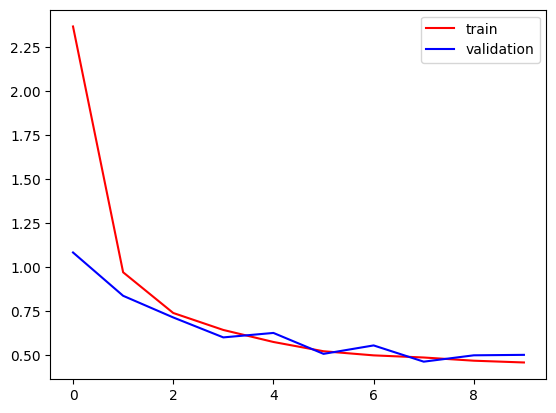

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.jpg')

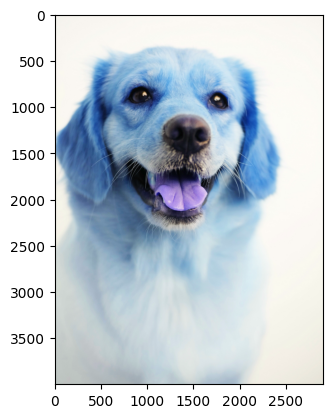

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4000, 2900, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 738ms/step


array([[0.4959641]], dtype=float32)